- Existe t-il une corrélation entre l’éditeur et le commentaire (score)
- Existe-t-il une corrélation entre les auteurs et le commentaire (score).
- Distribution des sentiments négatifs, neutres et positifs dans l'ensemble du
corpus
- Nombre le plus élevé de critiques négatives/positives/neutres sur les livres
- Existe-t-il une corrélation entre le prix et la revue (le score de la revue) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data_fusion.csv')

data.head()

,Titre,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores,Id,Prix,User_id,Nom lecteur,revue/utilité,revue/score,revue/heure,revue/résumé,revue/texte
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


# Existe t-il une corrélation entre l’éditeur et le commentaire (score)

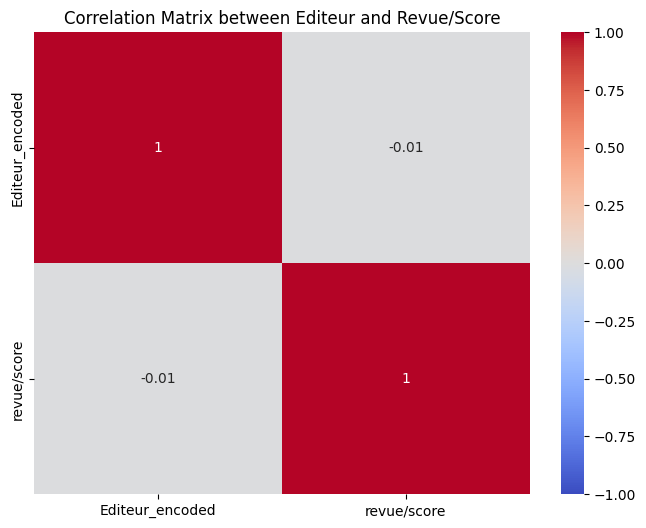

In [4]:
# Encode the 'Editeur' column to numeric values
data['Editeur_encoded'] = data['Editeur'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = data[['Editeur_encoded', 'revue/score']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Editeur and Revue/Score')
plt.show()

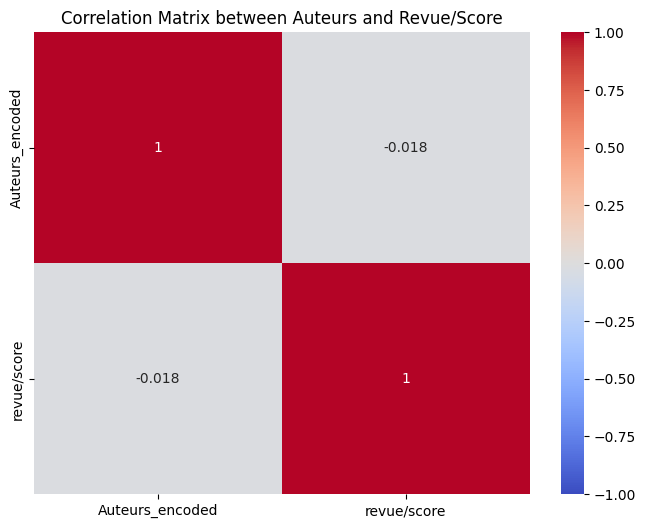

In [9]:
# Encode the 'Auteurs' column to numeric values
data['Auteurs_encoded'] = data['Auteurs'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix_auteurs = data[['Auteurs_encoded', 'revue/score']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_auteurs, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Auteurs and Revue/Score')
plt.show()

C:\Users\mathi\AppData\Local\Temp\ipykernel_13308\2004596790.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=note_percentages.index, y=note_percentages.values, palette='viridis')


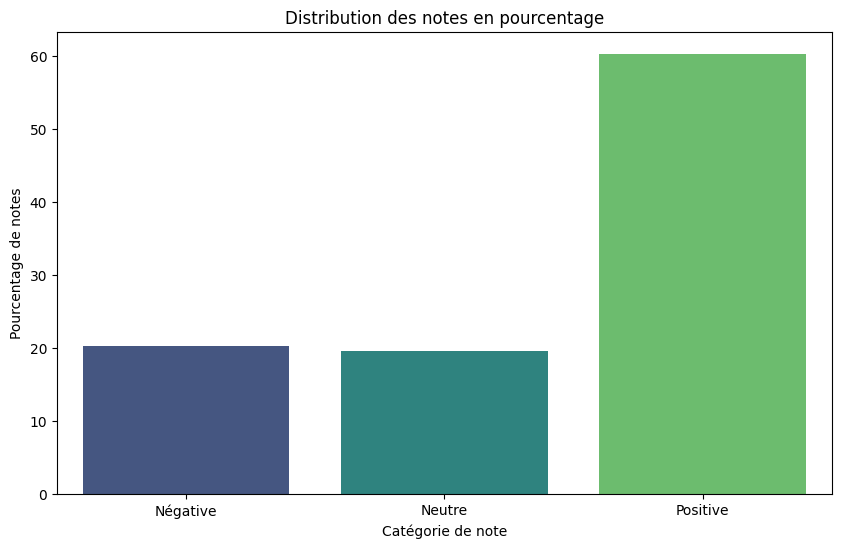

In [6]:
# Créer une nouvelle colonne pour les catégories de notes
data['note_categorie'] = pd.cut(data['revue/score'], bins=[-float('inf'), 3, 4, float('inf')], labels=['Négative', 'Neutre', 'Positive'], duplicates='drop')

# Compter le nombre de notes dans chaque catégorie
note_counts = data['note_categorie'].value_counts()

# Convertir les comptes en pourcentages
note_percentages = (note_counts / note_counts.sum()) * 100

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=note_percentages.index, y=note_percentages.values, palette='viridis')
plt.title('Distribution des notes en pourcentage')
plt.xlabel('Catégorie de note')
plt.ylabel('Pourcentage de notes')
plt.show()

In [7]:
# Group by 'Titre' and 'revue/score' and count the number of reviews in each category
book_review_counts = data.groupby(['Titre', 'revue/score']).size().unstack(fill_value=0)

# Find the book with the highest number of reviews for each score
most_negative_reviews = book_review_counts[1.0].idxmax()
most_neutral_reviews = book_review_counts[3.0].idxmax()
most_positive_reviews = book_review_counts[5.0].idxmax()

# Get the number of reviews for each category
num_negative_reviews = book_review_counts[1.0].max()
num_neutral_reviews = book_review_counts[3.0].max()
num_positive_reviews = book_review_counts[5.0].max()

print(f"Book with the most negative reviews: {most_negative_reviews} ({num_negative_reviews} reviews)")
print(f"Book with the most neutral reviews: {most_neutral_reviews} ({num_neutral_reviews} reviews)")
print(f"Book with the most positive reviews: {most_positive_reviews} ({num_positive_reviews} reviews)")

Book with the most negative reviews: Crossroads of Twilight (The Wheel of Time, Book 10) (1574 reviews)
Book with the most neutral reviews: Wuthering Heights (1259 reviews)
Book with the most positive reviews: The Hobbit (17304 reviews)


In [8]:
# Calculate the correlation matrix for 'Prix' and 'revue/score'
correlation_matrix_prix = data[['Prix', 'revue/score']].corr()

print(correlation_matrix_prix)

                Prix  revue/score
Prix         1.00000     -0.01051
revue/score -0.01051      1.00000
